In [2]:
from transformer_binary import TransformerBlock, TokenAndPositionEmbedding
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2024-04-06 19:46:22.897056: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Example data
num_samples = 1000
maxlen = 50
vocab_size = 1000
num_classes = 2

embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

inputs = tf.keras.layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dropout(0.1)(x)
outputs = tf.keras.layers.Dense(2, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [4]:
# Generate random input data
input_data = np.random.randint(0, vocab_size, size=(num_samples, maxlen))

# Generate random target data (one-hot encoded for multi-class classification)
target_data = np.random.randint(0, num_classes, size=(num_samples,))
target_data = tf.keras.utils.to_categorical(target_data, num_classes=num_classes)

- Input data needs shape --> (num_samples, seq_len)
- Label data needs shape --> (num_samples, num_classes)

In [8]:
print(f'input data has shape: {input_data.shape}')
print(f'target data has shape: {target_data.shape}')

input data has shape: (1000, 50)
target data has shape: (1000, 2)


Epoch 1/10


25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.5122 - loss: 0.7077 - val_accuracy: 0.4700 - val_loss: 0.6960
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5036 - loss: 0.6983 - val_accuracy: 0.5000 - val_loss: 0.6983
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6133 - loss: 0.6654 - val_accuracy: 0.5700 - val_loss: 0.6868
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7166 - loss: 0.6030 - val_accuracy: 0.5500 - val_loss: 0.7217
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7757 - loss: 0.4974 - val_accuracy: 0.4800 - val_loss: 0.9055
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8756 - loss: 0.3358 - val_accuracy: 0.5150 - val_loss: 1.0688
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9242 - loss: 0.2188 - val_accuracy: 0.5000 - val_loss: 1.3426
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9497 - loss: 0.1718 - val_accuracy: 0.5100 - val_loss: 1.

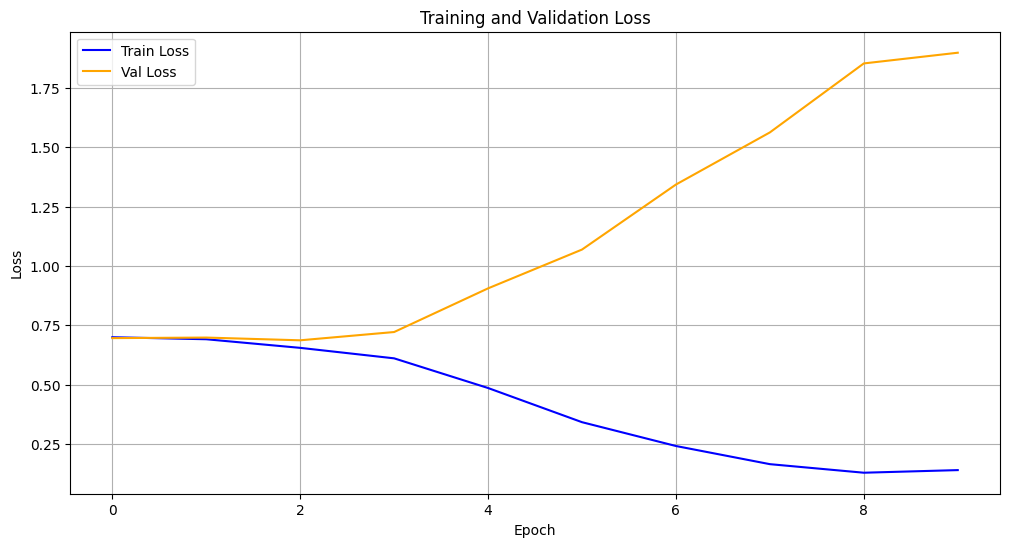

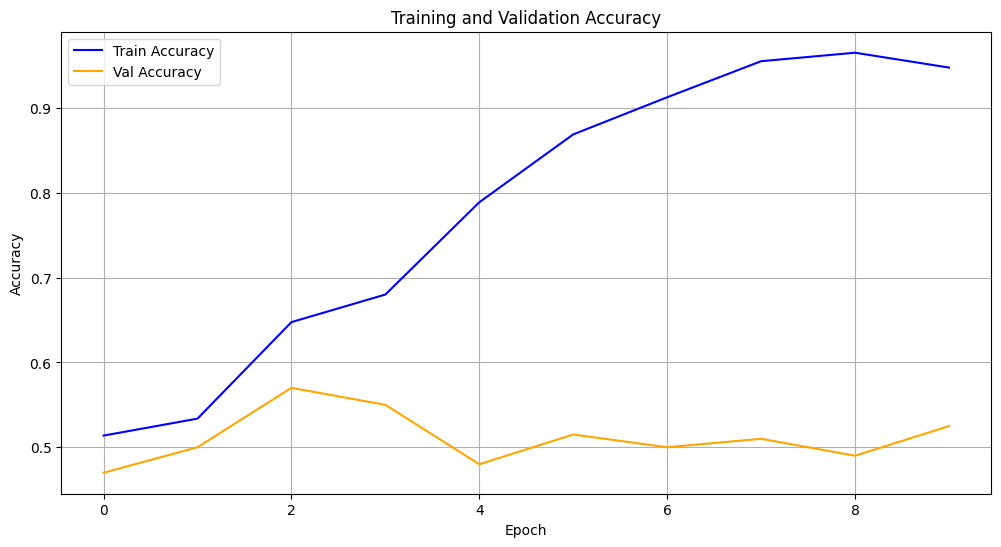

In [12]:
# Example usage: compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(input_data, target_data, epochs=10, batch_size=32, validation_split=0.2)
# Get training and validation loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get training and validation accuracy values
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot training and validation losses
plt.figure(figsize=(12, 6))
plt.plot(train_loss, label='Train Loss', color='blue')
plt.plot(val_loss, label='Val Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation accuracies
plt.figure(figsize=(12, 6))
plt.plot(train_acc, label='Train Accuracy', color='blue')
plt.plot(val_acc, label='Val Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()